In [1]:
%matplotlib notebook

In [2]:
import matplotlib as mpl
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

import alphashape
from descartes import PolygonPatch

from tracer.build.field_routines import trace as tr
from tracer.build.field_routines import bprecalc as bpre 
from tracer.build.field_routines import bfield as bf 

In [3]:
field_file = "/raven/u/phg/grid/tracer/W7X/Fields/Field-EIM-ErrFullT-high.dat"
bpre.restore_field(field_file)
bf.scale_components([0,0,1.0])

In [16]:
n_loop, degree_steps = 10000, 360
ss = 5*degree_steps

# magnetic axis
#gax = tr.field_line([5.8807,0,0], degree_steps*np.pi/180.0, 360/degree_steps*n_loop, substeps=720, dir=1)

# full outer surface
#gax0A = tr.field_line([6.27,0,0], degree_steps*np.pi/180.0, 360/degree_steps*n_loop, substeps=ss, dir=1)
#gax0B = tr.field_line([6.2661,0,0], degree_steps*np.pi/180.0, 360/degree_steps*n_loop, substeps=ss, dir=1)

# double / tripel / quadruple islands
gax1A = tr.field_line([5.725,-0.9,0], degree_steps*np.pi/180.0, 360/degree_steps*n_loop, substeps=ss, dir=1)
gax1B = tr.field_line([6.2335,0,0], degree_steps*np.pi/180.0, 360/degree_steps*n_loop, substeps=ss, dir=1)
gax1C = tr.field_line([6.236,0,0], degree_steps*np.pi/180.0, 360/degree_steps*n_loop, substeps=ss, dir=1)

#cax = np.vstack((gax2A[:-1], gax2AA[:-1]))  # single
#cax = np.vstack((gax1A[:-1], gax2A[:-1], gax2B[:-1]))  # double
#cax = np.vstack((gax1B[:-1], gax1A[:-1], gax2C[:-1]))  # triple
#cax = np.vstack((gax1C[:-1], gax1B[:-1], gax2D[:-1]))  # quadruple
#cax = np.vstack((gax0A[:-1], gax0B[:-1]))  # outer
cax = np.vstack((gax1A[:-1], gax1B[:-1], gax1C[:-1]))  # outer

R, Z, P = cax.T
X, Y = np.cos(P)*R, np.sin(P)*R

In [17]:
plt.close("all")
fig, ax = plt.subplots(figsize=(9.7,10))

gax = cax
ax.scatter(gax[:,0], gax[:,1], s=1, marker=".", color="k")

ax.set_aspect("equal")
fig.tight_layout()

ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
ax.set_title("")

<IPython.core.display.Javascript object>

Text(0.5, 1.0, '')

In [52]:
# inner islands
#gax2AA = tr.field_line([5.44,-0.71,0], degree_steps*np.pi/180.0, 360/degree_steps*n_loop, substeps=ss, dir=1)
#gax2A = tr.field_line([5.4386,-0.707,0], degree_steps*np.pi/180.0, 360/degree_steps*n_loop, substeps=ss, dir=1)
#gax2B = tr.field_line([5.718,-0.900,0], degree_steps*np.pi/180.0, 360/degree_steps*n_loop, substeps=ss, dir=1)
#gax2C = tr.field_line([6.2275,-0.000,0], degree_steps*np.pi/180.0, 360/degree_steps*n_loop, substeps=ss, dir=1)
#gax2D = tr.field_line([5.4822, 0.950,0], degree_steps*np.pi/180.0, 360/degree_steps*n_loop, substeps=ss, dir=1)

In [4]:
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

In [5]:
X1 = np.load("outer_edge_coords.npz")["data"]
X5 = np.load("single_island_edge_coords.npz")["data"]
X4 = np.load("double_island_edge_coords.npz")["data"]
X3 = np.load("triple_island_edge_coords.npz")["data"]
X2 = np.load("quad_island_edge_coords.npz")["data"]

In [8]:
X1.shape

(360, 2, 360)

<IPython.core.display.Javascript object>


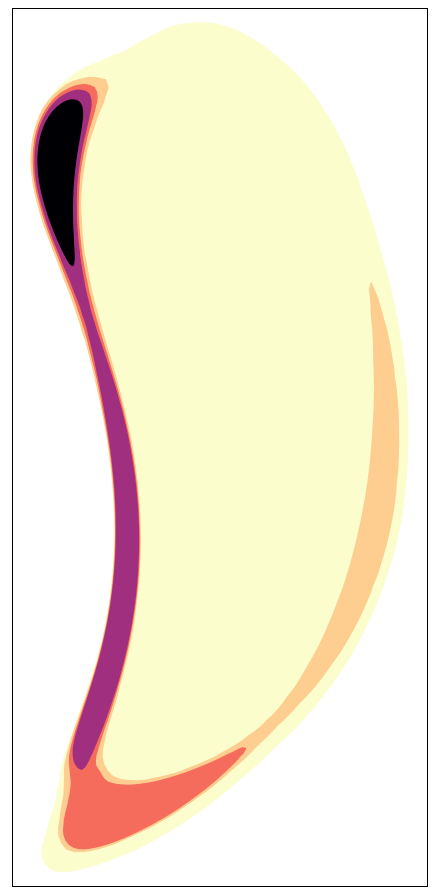

[2.11660451]


In [47]:
plt.close("all")
fig, ax = plt.subplots(figsize=(4.9,10))
ang = 13 - 72*1
rotang = -np.pi*0.17

prec = cm.get_cmap('magma_r', 50)
c = np.array([prec(f) for f in [0,0.1,0.3,0.55,0.999]])
c[0] = 0.2 + 0.8*c[0]


for c, a in zip(c, [X1, X2, X3, X4, X5]):
    a = a[ang].T
    X = np.cos(rotang) * a[:,0] - np.sin(rotang) * a[:,1]
    Y = np.cos(rotang) * a[:,1] + np.sin(rotang) * a[:,0]
    ax.fill(X, Y, lw=1, color=c, zorder=2)

ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
ax.set_title("")
ax.set_aspect("equal")

by, ty = ax.get_ylim()
ax.set_ylim(( (ty+by)/2 - 0.94*(ty-by)/2 ), ( (ty+by)/2 + 0.94*(ty-by)/2 ))

print( np.diff(np.array(ax.get_ylim()))/np.diff(np.array(ax.get_xlim()))  ) 

fig.tight_layout()
fig.subplots_adjust(left=0.01, bottom=0.01, right=0.99, top=0.99)

In [48]:
fig.savefig("./images/eim-err-island-fitting.pdf")
fig.savefig("./images/eim-err-island-fitting.pdf", dpi=200)